In [ ]:
!pip install opendatasets

In [ ]:
import opendatasets as od
od.download('https://www.kaggle.com/competitions/aptos2019-blindness-detection/data')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: lehuytu
Your Kaggle Key: ··········


100%|██████████| 9.51G/9.51G [05:52<00:00, 29.0MB/s]



Extracting archive ./aptos2019-blindness-detection/aptos2019-blindness-detection.zip to ./aptos2019-blindness-detection


In [ ]:
import cv2
import numpy as np
from PIL import Image
from tqdm import tqdm
from glob import glob
import pandas as pd
from collections import Counter
import os

train_folder = '/content/aptos2019-blindness-detection/train_images/*'
test_folder = '/content/aptos2019-blindness-detection/test_images/*'

# Các kích thước của ảnh

## Tính toán

In [ ]:
def get_unique_sizes(image_folder):
    size_counts = {}

    # Iterate through the images in the folder
    image_files = glob(image_folder) # Adjust the file extension if necessary
    for image_path in image_files:
        # Load the image and retrieve its size
        with Image.open(image_path) as img:
            width, height = img.size

        # Increment the count for the size or add it to the dictionary
        size = (width, height)
        if size in size_counts:
            size_counts[size] += 1
        else:
            size_counts[size] = 1

    # Convert the dictionary to a list of (size, count) tuples
    unique_sizes = [(size, count) for size, count in size_counts.items()]

    return unique_sizes

In [ ]:
train_unique_sizes = get_unique_sizes(train_folder)
test_unique_sizes = get_unique_sizes(test_folder)

## Plot ra

In [ ]:
import matplotlib.pyplot as plt

def plot_histograms(train_sizes, test_sizes):
    train_labels, train_frequencies = zip(*train_sizes)
    test_labels, test_frequencies = zip(*test_sizes)

    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    # Plot for train data
    train_bars = axes[0].bar(range(len(train_labels)), train_frequencies)
    axes[0].set_xticks(range(len(train_labels)))
    axes[0].set_xticklabels(train_labels, rotation=45)
    axes[0].set_xlabel('Size')
    axes[0].set_ylabel('Frequency')
    axes[0].set_title(f'Train : {len(train_labels)} Image Sizes')

    # Add frequency values on top of train bars
    for i, bar in enumerate(train_bars):
        axes[0].text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(train_frequencies[i]),
                     ha='center', va='bottom')

    # Plot for test data
    test_bars = axes[1].bar(range(len(test_labels)), test_frequencies)
    axes[1].set_xticks(range(len(test_labels)))
    axes[1].set_xticklabels(test_labels, rotation=45)
    axes[1].set_xlabel('Size')
    axes[1].set_ylabel('Frequency')
    axes[1].set_title(f'Test : {len(test_labels)} Image Sizes')

    # Add frequency values on top of test bars
    for i, bar in enumerate(test_bars):
        axes[1].text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(test_frequencies[i]),
                     ha='center', va='bottom')

    plt.tight_layout()
    plt.show()

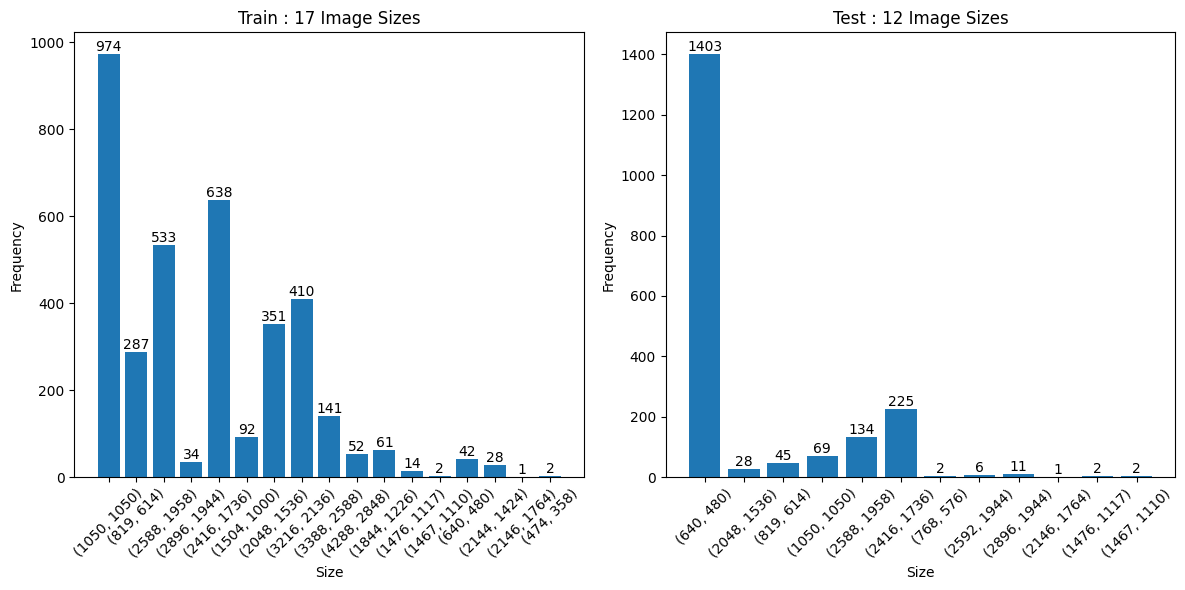

In [ ]:
plot_histograms(train_unique_sizes, test_unique_sizes)

# Visualizing Images For Each Class

In [ ]:
def visualize_images(sample_images, image_folder):

    fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(10, 10))

    for i, item in enumerate(sample_images):
        label = item['label']

        for j, id in enumerate(item['id']):
            image_path = image_folder + id + '.png'
            ax = axes[j][i]
            image = plt.imread(image_path)
            ax.imshow(image)
            ax.axis('off')

        axes[0][i].set_title(f'Label: {label}')

    plt.tight_layout()
    plt.show()


def get_samples_from_labels(csv_file):

    res = []
    # Read the CSV file
    df = pd.read_csv(csv_file)

    # Get unique labels
    unique_labels = sorted(df['diagnosis'].unique())

    # Get five samples for each unique label
    for label in unique_labels:
        label_samples = df[df['diagnosis'] == label].head(4)

        item = {
            'label' : label,
            'id' : label_samples.id_code.tolist()
        }
        res.append(item)

    return res

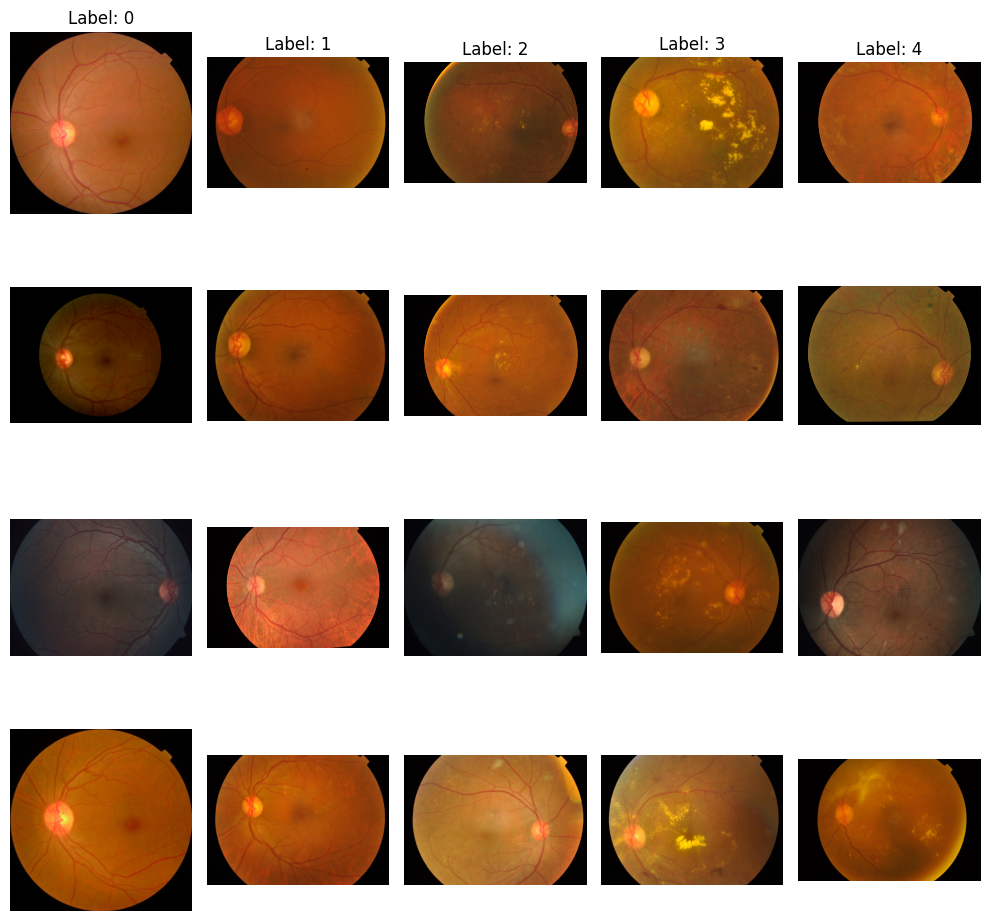

In [ ]:
sample_images = get_samples_from_labels('/content/aptos2019-blindness-detection/train.csv')
visualize_images(sample_images, '/content/aptos2019-blindness-detection/train_images/')